Smith malha aberta

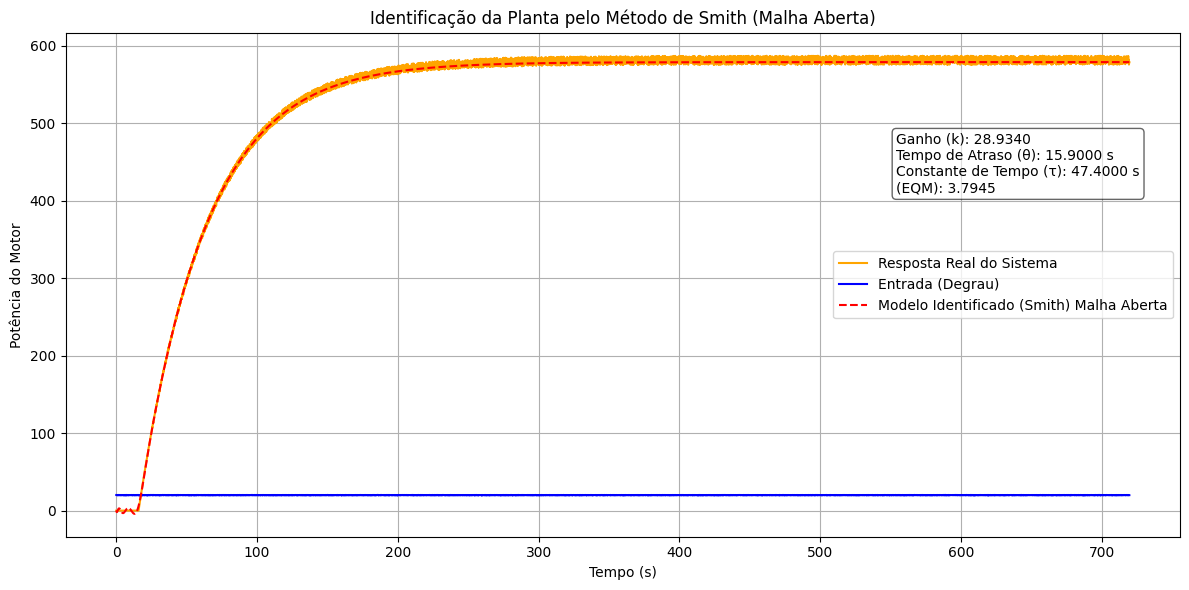

Método de Identificação: Smith (Malha Aberta)
Parâmetros Identificados:
Ganho (k): 28.9340
Tempo de Atraso (θ): 15.9000 s
Constante de Tempo (τ): 47.4000 s
Função de Transferência do Modelo Identificado: G(s) = 28.9340 * e^(-15.9000 * s) / (47.4000 * s + 1)
Erro Quadrático Médio (EQM): 3.7945026081031736
Tempo de subida(tr): 104.1268 s
Tempo de acomodação(ts): 201.3319 s
valor de pico: 28.8935


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 28,3% e 63,2% do valor final
y1 = 0.283 * valor_final
y2 = 0.632 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Smith
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. Modelo Identificado usando a Função de Transferência
# Modelo: G(s) = k * exp(-theta*s) / (tau * s + 1)
def modelo_identificado(k, tau, theta):
    # Função de transferência do sistema de primeira ordem: G(s) = k / (tau * s + 1)
    G_s = ctrl.tf([k], [tau, 1])
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(G_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# 7. Simular a resposta ao degrau do modelo identificado
t_sim, y_modelo = ctrl.step_response(resposta_modelo*amplitude_degrau, T=tempo)

# 8. Cálculo do Erro Quadrático Médio (EQM)
EQM = np.sqrt(np.sum((y_modelo - saida) ** 2) / len(saida))

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(tempo, saida, 'orange', label='Resposta Real do Sistema')
plt.plot(tempo, entrada, label='Entrada (Degrau)', color='blue')
plt.plot(t_sim, y_modelo, 'r--', label='Modelo Identificado (Smith) Malha Aberta')
plt.title('Identificação da Planta pelo Método de Smith (Malha Aberta)')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

textstr = '\n'.join((
    f'Ganho (k): {k:.4f}',
    f'Tempo de Atraso (θ): {theta:.4f} s',
    f'Constante de Tempo (τ): {tau:.4f} s',
    f'(EQM): {EQM:.4f}'))

# Posicionar a caixa com os resultados no gráfico
plt.text(tempo[-1] * 0.77, max(saida) * 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Método de Identificação: Smith (Malha Aberta)')
print(f'Parâmetros Identificados:')
print(f'Ganho (k): {k:.4f}')
print(f'Tempo de Atraso (θ): {theta:.4f} s')
print(f'Constante de Tempo (τ): {tau:.4f} s')
print(f'Função de Transferência do Modelo Identificado: G(s) = {k:.4f} * e^(-{theta:.4f} * s) / ({tau:.4f} * s + 1)')
print(f'Erro Quadrático Médio (EQM): {EQM}')

info = ctrl.step_info(resposta_modelo)
# Exibir o tempo de subida e o tempo de acomodação
print(f"Tempo de subida(tr): {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação(ts): {info['SettlingTime']:.4f} s")
print(f"valor de pico: {info['Peak']:.4f}")


Smith malha fechada

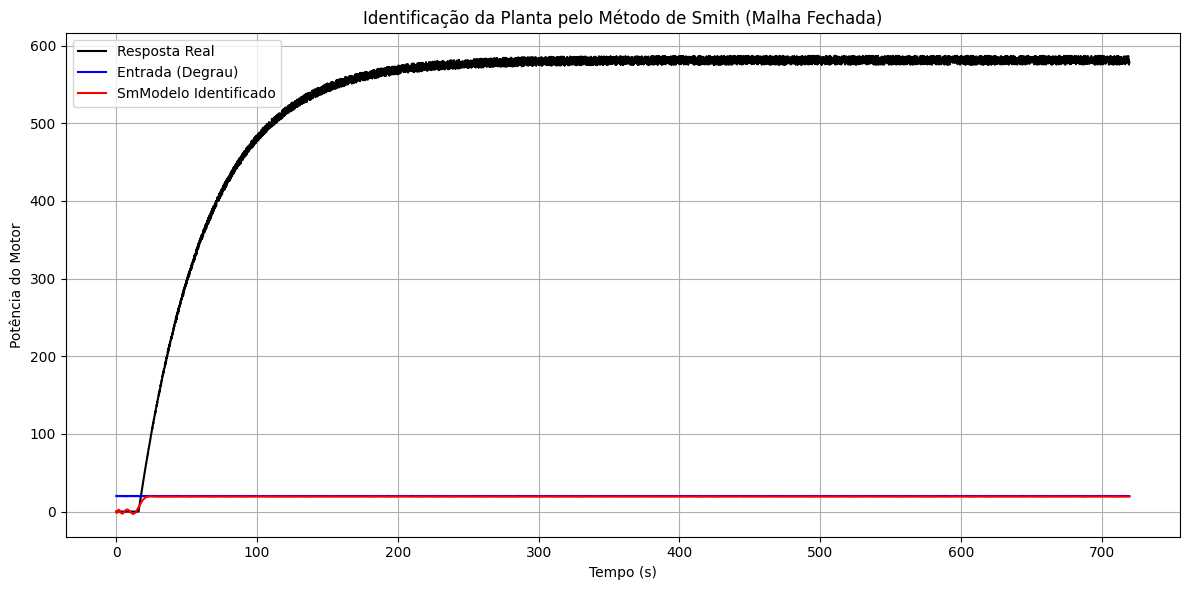

Método de Identificação: Smith (Malha Fechada)
Parâmetros Identificados:
Ganho (k): 28.9340
Tempo de Atraso (θ): 15.9000 s
Constante de Tempo (τ): 47.4000 s
Erro Quadrático Médio (EQM): 3.1284395475206934
Tempo de subida(tr): 18.8112 s
Tempo de acomodação(ts): 22.0922 s
valor de pico: 0.9730


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 28,3% e 63,2% do valor final
y1 = 0.283 * valor_final
y2 = 0.632 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Smith
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. Modelo Identificado usando a Função de Transferência
# Modelo: G(s) = k * exp(-theta*s) / (tau * s + 1)
def modelo_identificado(k, tau, theta):
    # Função de transferência do sistema de primeira ordem: G(s) = k / (tau * s + 1)
    G_s = ctrl.tf([k], [tau, 1])
    H_s = ctrl.feedback(G_s, 1)
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(H_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# 7. Simular a resposta ao degrau do modelo identificado
t_sim, y_modelo = ctrl.step_response(resposta_modelo*amplitude_degrau, T=tempo)

# 8. Cálculo do Erro Quadrático Médio (EQM)
EQM = np.sqrt(np.sum((y_modelo - entrada) ** 2) / len(entrada))

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(tempo, saida, 'black', label='Resposta Real')
plt.plot(tempo, entrada, label='Entrada (Degrau)', color='blue')
plt.plot(t_sim, y_modelo, 'r', label='SmModelo Identificado')
plt.title('Identificação da Planta pelo Método de Smith (Malha Fechada)')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
# props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

# textstr = '\n'.join((
#     f'Ganho (k): {k:.4f}',
#     f'Tempo de Atraso (θ): {theta:.4f} s',
#     f'Constante de Tempo (τ): {tau:.4f} s',
#     f'(EQM): {EQM:.4f}'))

# # Posicionar a caixa com os resultados no gráfico
# plt.text(tempo[-1] * 0.77, max(saida) * 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Método de Identificação: Smith (Malha Fechada)')
print(f'Parâmetros Identificados:')
print(f'Ganho (k): {k:.4f}')
print(f'Tempo de Atraso (θ): {theta:.4f} s')
print(f'Constante de Tempo (τ): {tau:.4f} s')
print(f'Erro Quadrático Médio (EQM): {EQM}')

info = ctrl.step_info(resposta_modelo)
# Exibir o tempo de subida e o tempo de acomodação
print(f"Tempo de subida(tr): {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação(ts): {info['SettlingTime']:.4f} s")
print(f"valor de pico: {info['Peak']:.4f}")

Sundaresan malha aberta

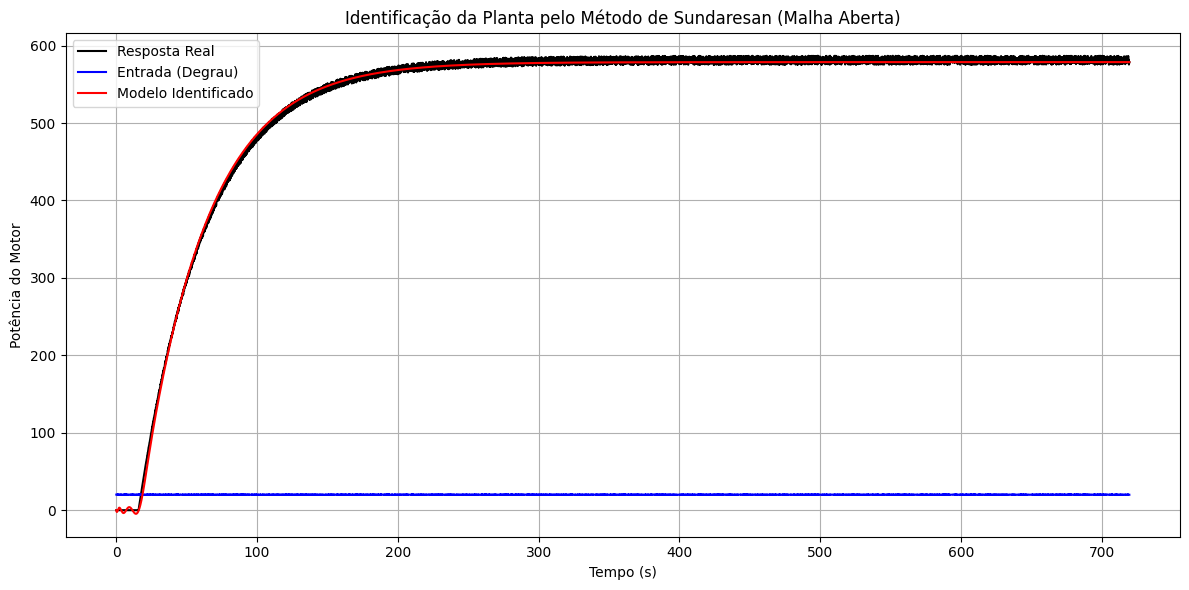

Método de Identificação: Sundaresan (Malha Aberta)
Parâmetros Identificados:
Ganho (k): 28.9340
Tempo de Atraso (θ): 17.1450 s
Constante de Tempo (τ): 45.3333 s
Função de Transferência do Modelo Identificado: G(s) = 28.9340 * e^(-17.1450 * s) / (45.3333 * s + 1)
Erro Quadrático Médio (EQM): 4.320084656322369
Tempo de subida: 99.6244 s
Tempo de acomodação: 194.7056 s


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 35,3% e 85,3% do valor final
y1 = 0.353 * valor_final
y2 = 0.853 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Sundaresan
tau = (2/3) * (t2 - t1)
theta = (1.3*t1) - (0.29*t2)

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. Modelo Identificado usando a Função de Transferência
# Modelo: G(s) = k * exp(-theta*s) / (tau * s + 1)
def modelo_identificado(k, tau, theta):
    # Função de transferência do sistema de primeira ordem: G(s) = k / (tau * s + 1)
    G_s = ctrl.tf([k], [tau, 1])
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(G_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# 7. Simular a resposta ao degrau do modelo identificado
t_sim, y_modelo = ctrl.step_response(resposta_modelo*amplitude_degrau, T=tempo)

# 8. Cálculo do Erro Quadrático Médio (EQM)
EQM = np.sqrt(np.sum((y_modelo - saida) ** 2) / len(saida))

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(tempo, saida, 'black', label='Resposta Real')
plt.plot(tempo, entrada, label='Entrada (Degrau)', color='blue')
plt.plot(t_sim, y_modelo, 'r', label='Modelo Identificado')
plt.title('Identificação da Planta pelo Método de Sundaresan (Malha Aberta)')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
# props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

# textstr = '\n'.join((
#     f'Ganho (k): {k:.4f}',
#     f'Tempo de Atraso (θ): {theta:.4f} s',
#     f'Constante de Tempo (τ): {tau:.4f} s',
#     f'(EQM): {EQM:.4f}'))

# # Posicionar a caixa com os resultados no gráfico
# plt.text(tempo[-1] * 0.77, max(saida) * 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Método de Identificação: Sundaresan (Malha Aberta)')
print(f'Parâmetros Identificados:')
print(f'Ganho (k): {k:.4f}')
print(f'Tempo de Atraso (θ): {theta:.4f} s')
print(f'Constante de Tempo (τ): {tau:.4f} s')
print(f'Função de Transferência do Modelo Identificado: G(s) = {k:.4f} * e^(-{theta:.4f} * s) / ({tau:.4f} * s + 1)')
print(f'Erro Quadrático Médio (EQM): {EQM}')

info = ctrl.step_info(resposta_modelo)
# Exibir o tempo de subida e o tempo de acomodação
print(f"Tempo de subida: {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação: {info['SettlingTime']:.4f} s")

sundaresan malha fechada

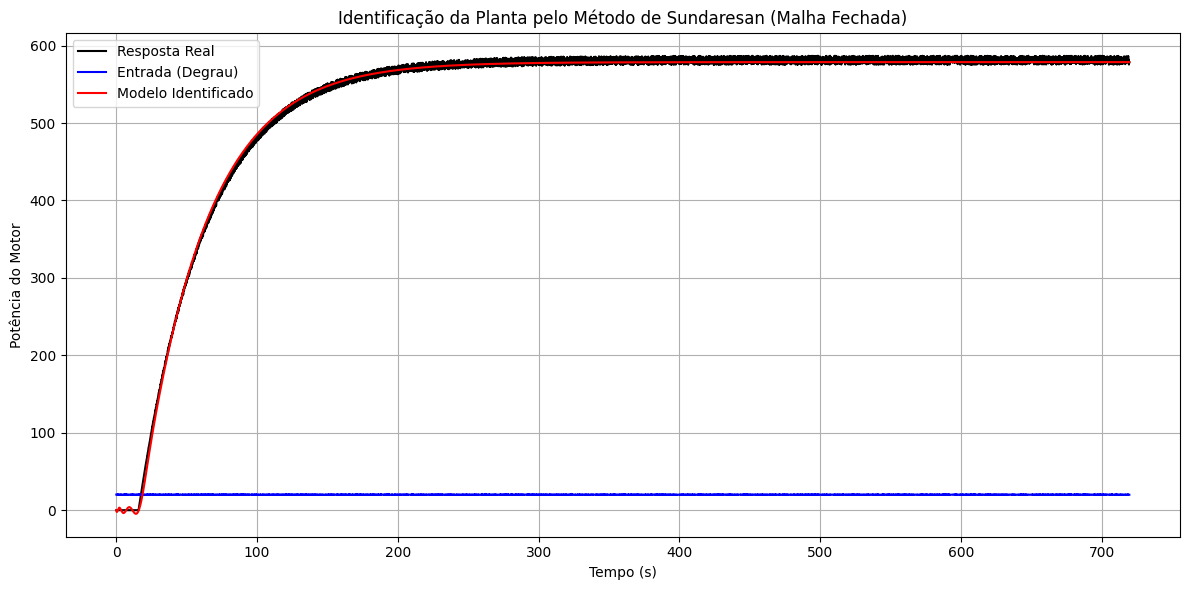

Método de Identificação: Sundaresan (Malha Fechada)
Parâmetros Identificados:
Ganho (k): 28.9340
Tempo de Atraso (θ): 17.1450 s
Constante de Tempo (τ): 45.3333 s
Erro Quadrático Médio (EQM): 523.9663974798509
Tempo de subida: 99.6244 s
Tempo de acomodação: 194.7056 s


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 35,3% e 85,3% do valor final
y1 = 0.353 * valor_final
y2 = 0.853 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Sundaresan
tau = (2/3) * (t2 - t1)
theta = (1.3*t1) - (0.29*t2)

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. Modelo Identificado usando a Função de Transferência
# Modelo: G(s) = k * exp(-theta*s) / (tau * s + 1)
def modelo_identificado(k, tau, theta):
    # Função de transferência do sistema de primeira ordem: G(s) = k / (tau * s + 1)
    G_s = ctrl.tf([k], [tau, 1])
    H_s = ctrl.feedback(G_s, 1)
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(G_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# 7. Simular a resposta ao degrau do modelo identificado
t_sim, y_modelo = ctrl.step_response(resposta_modelo*amplitude_degrau, T=tempo)

# 8. Cálculo do Erro Quadrático Médio (EQM)
EQM = np.sqrt(np.sum((y_modelo - entrada) ** 2) / len(entrada))

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(tempo, saida, 'black', label='Resposta Real')
plt.plot(tempo, entrada, label='Entrada (Degrau)', color='blue')
plt.plot(t_sim, y_modelo, 'r', label='Modelo Identificado')
plt.title('Identificação da Planta pelo Método de Sundaresan (Malha Fechada)')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
# props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

# textstr = '\n'.join((
#     f'Ganho (k): {k:.4f}',
#     f'Tempo de Atraso (θ): {theta:.4f} s',
#     f'Constante de Tempo (τ): {tau:.4f} s',
#     f'(EQM): {EQM:.4f}'))

# # Posicionar a caixa com os resultados no gráfico
# plt.text(tempo[-1] * 0.77, max(saida) * 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Método de Identificação: Sundaresan (Malha Fechada)')
print(f'Parâmetros Identificados:')
print(f'Ganho (k): {k:.4f}')
print(f'Tempo de Atraso (θ): {theta:.4f} s')
print(f'Constante de Tempo (τ): {tau:.4f} s')
print(f'Erro Quadrático Médio (EQM): {EQM}')

info = ctrl.step_info(resposta_modelo)
# Exibir o tempo de subida e o tempo de acomodação
print(f"Tempo de subida: {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação: {info['SettlingTime']:.4f} s")

4. Plote as respostas do Sistema em Malha Aberta e Fechada e comente sobre as diferen¸cas
nos Tempos de subida e de acomoda¸c˜ao e no erro do processo;

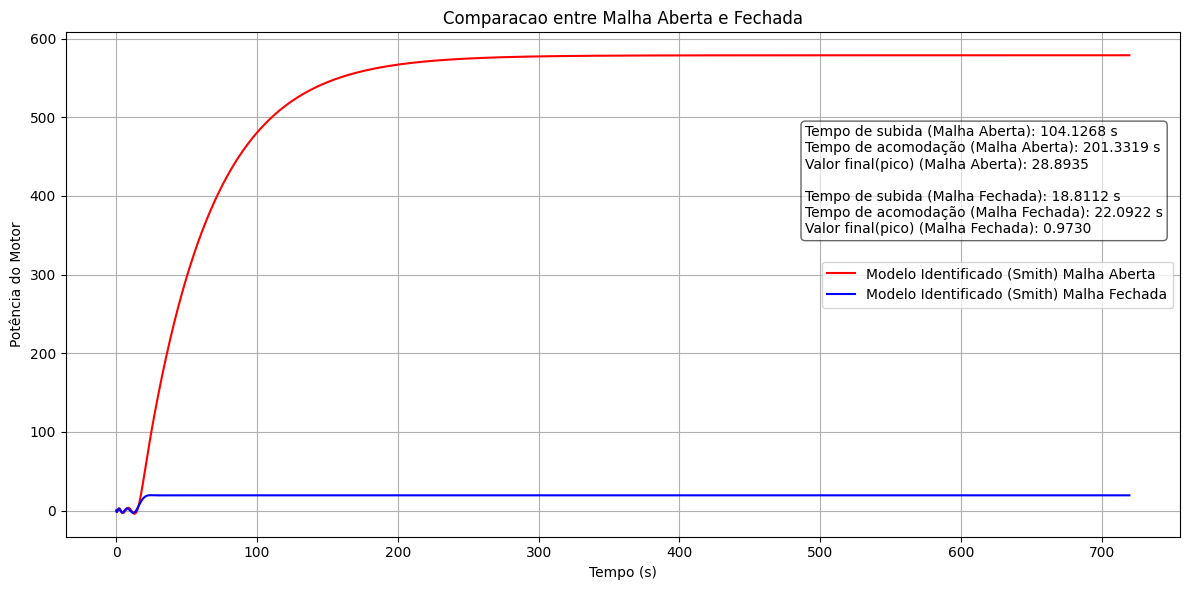


Comparação entre Resposta do Sistema em Malha Aberta e Fechada:

  - O sistema em malha fechada tem menor tempo de subida.
  - O sistema em malha fechada tem menor tempo de acomodação.
  - O sistema em malha aberta tem maior valor final(pico).

Erro Quadrático Médio (EQM) para Malha Aberta: 3.7945
Erro Quadrático Médio (EQM) para Malha Fechada: 525.8158


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')
# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 28,3% e 63,2% do valor final
y1 = 0.283 * valor_final
y2 = 0.632 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Smith
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. Modelo Identificado usando a Função de Transferência
def modelo_identificado_malha_aberta(k, tau, theta):
    G_s = ctrl.tf([k], [tau, 1])
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(G_s, Pade_approx)

# 6. Modelo Identificado usando a Função de Transferência
def modelo_identificado_malha_fechada(k, tau, theta):
    G_s = ctrl.tf([k], [tau, 1])
    H_s = ctrl.feedback(G_s, 1)
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(H_s, Pade_approx)

# 7. Calcular a resposta estimada usando o modelo
resposta_malha_aberta = modelo_identificado_malha_aberta(k, tau, theta)
resposta_malha_fechada = modelo_identificado_malha_fechada(k, tau, theta)

# 8. Simular a resposta ao degrau dos modelos
t_sim_aberta, y_modelo_aberta = ctrl.step_response(resposta_malha_aberta * amplitude_degrau, T=tempo)
t_sim_fechada, y_modelo_fechada = ctrl.step_response(resposta_malha_fechada * amplitude_degrau, T=tempo)

# 9. Calcular o Erro Quadrático Médio (EQM) para ambos os modelos
EQM_aberta = np.sqrt(np.sum((y_modelo_aberta - saida) ** 2) / len(saida))
EQM_fechada = np.sqrt(np.sum((y_modelo_fechada - saida) ** 2) / len(saida))

info_aberta = ctrl.step_info(resposta_malha_aberta)
info_fechada = ctrl.step_info(resposta_malha_fechada)

# 10. Visualização dos Resultados malha aberta
plt.figure(figsize=(12, 6))
plt.plot(t_sim_aberta, y_modelo_aberta, 'r', label='Modelo Identificado (Smith) Malha Aberta')
plt.plot(t_sim_fechada, y_modelo_fechada, 'b', label='Modelo Identificado (Smith) Malha Fechada')
plt.title('Comparacao entre Malha Aberta e Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

textstr = '\n'.join((
    f'Tempo de subida (Malha Aberta): {info_aberta['RiseTime']:.4f} s',
    f'Tempo de acomodação (Malha Aberta): {info_aberta['SettlingTime']:.4f} s',
    f'Valor final(pico) (Malha Aberta): {info_aberta['Peak']:.4f}\n',
    f'Tempo de subida (Malha Fechada): {info_fechada['RiseTime']:.4f} s',
    f'Tempo de acomodação (Malha Fechada): {info_fechada['SettlingTime']:.4f} s',
    f'Valor final(pico) (Malha Fechada): {info_fechada['Peak']:.4f}'))

# Posicionar a caixa com os resultados no gráfico
plt.text(tempo[-1] * 0.68, max(saida) * 0.6, textstr, fontsize=10, bbox=props)

plt.show()

# Comparação entre os sistemas em malha aberta e fechada
print('\nComparação entre Resposta do Sistema em Malha Aberta e Fechada:\n')

if info_aberta['RiseTime'] < info_fechada['RiseTime']:
    print('  - O sistema em malha aberta tem menor tempo de subida.')
else:
    print('  - O sistema em malha fechada tem menor tempo de subida.')

if info_aberta['SettlingTime'] < info_fechada['SettlingTime']:
    print('  - O sistema em malha aberta tem menor tempo de acomodação.')
else:
    print('  - O sistema em malha fechada tem menor tempo de acomodação.')

if info_aberta['Peak'] > info_fechada['Peak']:
    print('  - O sistema em malha aberta tem maior valor final(pico).')
else:
    print('  - O sistema em malha fechada tem maior valor final(pico).')

# Resultados dos Erros Quadráticos Médios
print(f'\nErro Quadrático Médio (EQM) para Malha Aberta: {EQM_aberta:.4f}')
print(f'Erro Quadrático Médio (EQM) para Malha Fechada: {EQM_fechada:.4f}')


5 - Calculo IMC

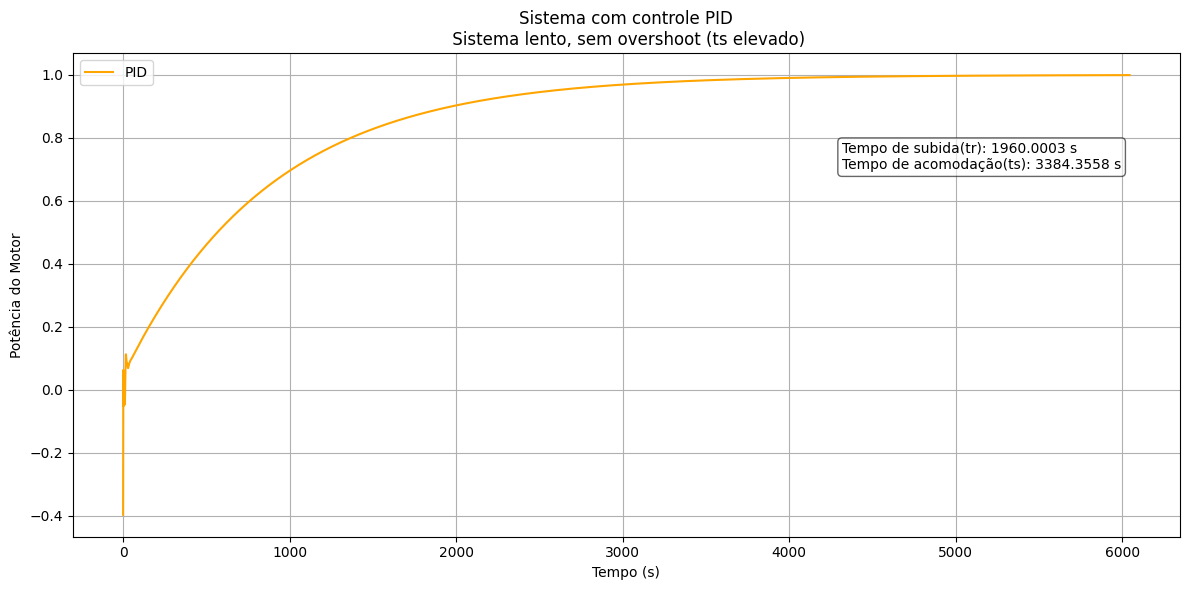

Sistema com controle PID
respostas:
Tempo de subida(tr): 1960.0003 s
Tempo de acomodação(ts): 3384.3558 s
valor de pico: 0.9990


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 28,3% e 63,2% do valor final
y1 = 0.283 * valor_final
y2 = 0.632 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Smith
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. função de tranferencia do modelo
def modelo_identificado(k, tau, theta):
    G_s = ctrl.tf([k], [tau, 1])
    H_s = ctrl.feedback(G_s, 1)
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(H_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# Calculando os valores de kp, ti e td
lamb = 20 # lambda tem que ser maior que 10.2 (lamb/theta > 0.8)
kp = ((2*tau)+theta)/(k*((2*lamb)+theta))
ti = tau+(theta/2)
td = (tau*theta)/((2*tau)+theta)

# 7. função do PID
def funcao_PID(kp, ti, td):
    pid = ctrl.tf([kp*td, kp, kp/ti], [1, 0])
    return pid

PID = funcao_PID(kp, ti, td)

# Sistema em malha fechada com controlador PID e modelo identificado
sistema_em_malha_fechada = ctrl.feedback(ctrl.series(PID, resposta_modelo))

# Simulação da resposta ao degrau
t_sim, y_modelo = ctrl.step_response(sistema_em_malha_fechada)

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(t_sim, y_modelo, 'orange', label='PID')
plt.title('Sistema com controle PID\n Sistema lento, sem overshoot (ts elevado)')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

info = ctrl.step_info(sistema_em_malha_fechada)

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

textstr = '\n'.join((
    f'Tempo de subida(tr): {info['RiseTime']:.4f} s',
    f'Tempo de acomodação(ts): {info['SettlingTime']:.4f} s'))

# Posicionar a caixa com os resultados no gráfico
plt.text(tempo[-1] * 6, 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Sistema com controle PID')
print(f'respostas:')

info = ctrl.step_info(sistema_em_malha_fechada)
print(f"Tempo de subida(tr): {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação(ts): {info['SettlingTime']:.4f} s")
print(f"valor de pico: {info['Peak']:.4f}")


Calculo CHR com Sobrevalor

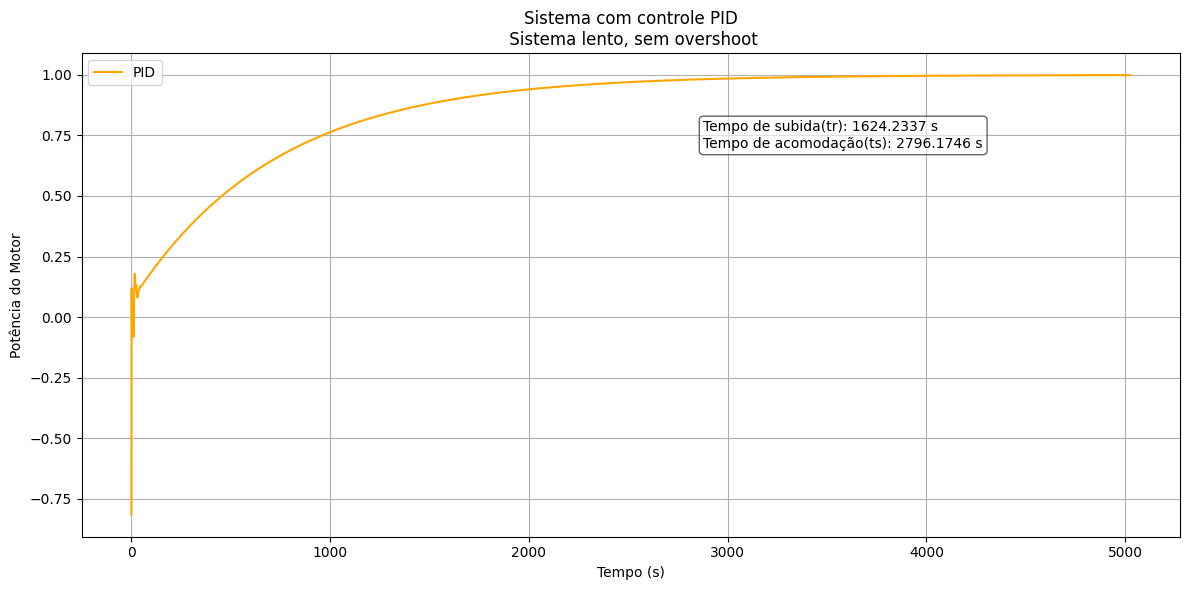

Sistema com controle PID
respostas:

Tempo de subida(tr): 1624.2337 s
Tempo de acomodação(ts): 2796.1746 s
valor de pico: 0.9991



In [66]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Carregar o dataset
data = loadmat(r'C:\Users\victo\Documents\Sistemas-Embarcados\Projeto_pratico\Dataset_Grupo4.mat')

# Extraindo entrada, saída e tempo
entrada = data['TARGET_DATA____ProjetoC213_Degrau'][1]  # A segunda linha é a entrada
saida = data['TARGET_DATA____ProjetoC213_PotenciaMotor'][1]  # A segunda linha é a saída
tempo = data['TARGET_DATA____ProjetoC213_Degrau'][0]  # A primeira linha é o tempo

# 1. Determinar o valor final da saída
valor_final = saida[-1]

# 2. Encontrar os tempos correspondentes a 28,3% e 63,2% do valor final
y1 = 0.283 * valor_final
y2 = 0.632 * valor_final

# Encontrar t1 e t2 nos dados
t1 = tempo[np.where(saida >= y1)[0][0]]
t2 = tempo[np.where(saida >= y2)[0][0]]

# 3. Calcular τ e θ usando o Método de Smith
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# 4. Calcular o ganho k
amplitude_degrau = entrada.mean()  # Amplitude do degrau de entrada
k = (valor_final - saida[0]) / amplitude_degrau

# 5. função de tranferencia do modelo
def modelo_identificado(k, tau, theta):
    G_s = ctrl.tf([k], [tau, 1])
    H_s = ctrl.feedback(G_s, 1)
    # Aproximação de Pade para o atraso
    num_pade, den_pade = ctrl.pade(theta, 5)  # Aproximação de ordem 5
    Pade_approx = ctrl.tf(num_pade, den_pade)
    # Função de transferência com atraso
    return ctrl.series(H_s, Pade_approx)

# 6. Calcular a resposta estimada usando o modelo
resposta_modelo = modelo_identificado(k, tau, theta)

# Calculando os valores de kp, ti e td
kp = (0.95*tau)/(k*theta)
ti = 1.357 * tau
td = 0.473 * theta

# 7. função do PID
def funcao_PID(kp, ti, td):
    pid = ctrl.tf([kp*td, kp, kp/ti], [1, 0])
    return pid

PID = funcao_PID(kp, ti, td)

# Sistema em malha fechada com controlador PID e modelo identificado
sistema_em_malha_fechada = ctrl.feedback(ctrl.series(PID, resposta_modelo))

# Simulação da resposta ao degrau
t_sim, y_modelo = ctrl.step_response(sistema_em_malha_fechada)

# 9. Visualização dos Resultados
plt.figure(figsize=(12, 6))
plt.plot(t_sim, y_modelo, 'orange', label='PID')
plt.title('Sistema com controle PID\n Sistema lento, sem overshoot')
plt.xlabel('Tempo (s)')
plt.ylabel('Potência do Motor')
plt.legend()
plt.grid()
plt.tight_layout()

info = ctrl.step_info(sistema_em_malha_fechada)

# Adicionando os parâmetros identificados no gráfico em uma caixa delimitada
props = dict(boxstyle='round', facecolor='white', alpha=0.6)  # Estilo da caixa

textstr = '\n'.join((
    f'Tempo de subida(tr): {info['RiseTime']:.4f} s',
    f'Tempo de acomodação(ts): {info['SettlingTime']:.4f} s'))

# Posicionar a caixa com os resultados no gráfico
plt.text(tempo[-1] * 4, 0.7, textstr, fontsize=10, bbox=props)

plt.show()

# Exibir os resultados
print(f'Sistema com controle PID')
print(f'respostas:\n')

info = ctrl.step_info(sistema_em_malha_fechada)
print(f"Tempo de subida(tr): {info['RiseTime']:.4f} s")
print(f"Tempo de acomodação(ts): {info['SettlingTime']:.4f} s")
print(f"valor de pico: {info['Peak']:.4f}\n")
